In [1]:
import pandas as pd
import glob
from DeepMRI import DeepMRI
import SegAN_arch as segan_original
import SegAN_IO_arch as seganio
import seaborn as sb
import matplotlib.pyplot as plt

models_path = 'models/'
checkpoint_basename = 'best_dice_score_'
sb.set_style("whitegrid")
sb.set_context("paper", font_scale=2)

## Print best models (validation) for each run in './models/'

In [2]:
def run_evaluation(model_name, model_epoch, mri_types, architecture, dataset, seed=1234567890):
    model_checkpoint = glob.glob(models_path + model_name + '/' + checkpoint_basename + str(model_epoch) + '*.index')[0].replace('.index', '')
    model = DeepMRI(batch_size=64, size=160, mri_channels=len(mri_types), model_name=model_name)
    model.load_dataset(dataset=dataset, mri_types=mri_types)
    model.build_model(load_model=model_checkpoint, seed=1234567890, arch=architecture)
    valid_scores = model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_valid.csv', 'validation')
    test_scores = model.evaluate('results/'+model_name+'_'+ str(model_epoch) + '_test.csv', 'testing')
    return pd.concat([valid_scores, test_scores], ignore_index=True)

metric='dice_score'
for csv in glob.glob('models/*/log_valid.csv'):
    modelname = csv.split('/')[1]
    pdcsv = pd.read_csv(csv)
    best = pdcsv.loc[pdcsv['dice_score'].idxmax()]
    print("Model: {} - Best {} {} at epoch {}".format(modelname, metric, best['dice_score'], best['epoch']))

Model: Segan_IO_TF2_brats_on_T2 - Best dice_score 0.7209994792938232 at epoch 182
Model: Segan_IO_TF2_brats_on_T1c - Best dice_score 0.6112254858016968 at epoch 1011
Model: Segan_IO_TF2_brats_on_T1 - Best dice_score 0.5665786266326904 at epoch 861
Model: Segan_IO_TF2_brats_on_FLAIR - Best dice_score 0.8281170129776001 at epoch 168
Model: Transfer_Brats_Flair_to_T1 - Best dice_score 0.5223069190979004 at epoch 273
Model: Transfer_Brats_Flair_to_T1_freeze_all - Best dice_score 0.6193402409553528 at epoch 1122
Model: Segan_IO_TF2_brats_ALL - Best dice_score 0.8703919053077698 at epoch 1123
Model: Segan_TF2_brats_ALL - Best dice_score 0.8516631722450256 at epoch 1386
Model: Segan_NoDice_TF2_brats_ALL - Best dice_score 0.7540416717529297 at epoch 842
Model: Transfer_Brats_Flair_to_T1c - Best dice_score 0.5756619572639465 at epoch 722
Model: Transfer_Brats_Flair_to_T2 - Best dice_score 0.7389530539512634 at epoch 1522
Model: Transfer_Brats_Flair_to_T2_freeze_all - Best dice_score 0.793391048

# Base Models (All Modalities)

In [3]:
base_paper = run_evaluation("Segan_TF2_brats_ALL", model_epoch=1386, mri_types=["MR_T1", "MR_T1c", "MR_T2", "MR_Flair"], architecture=segan_original, dataset='brats')
base_nodice = run_evaluation("Segan_NoDice_TF2_brats_ALL", model_epoch=842, mri_types=["MR_T1", "MR_T1c", "MR_T2", "MR_Flair"], architecture=segan_original, dataset='brats')
our_full = run_evaluation("Segan_IO_TF2_brats_ALL", model_epoch=1123, mri_types=["MR_T1", "MR_T1c", "MR_T2", "MR_Flair"], architecture=seganio, dataset='brats')
basemodels = pd.concat([base_paper, base_nodice, our_full], ignore_index=True)

Loading dataset brats with modalities MR_T1,MR_T1c,MR_T2,MR_Flair
Done.
Using architecture: SegAN_arch
Loaded history from models/Segan_TF2_brats_ALL/log_train.csv
Loaded history from models/Segan_TF2_brats_ALL/log_valid.csv
Loading models/Segan_TF2_brats_ALL/best_dice_score_1386-13
Loaded model from: models/Segan_TF2_brats_ALL/best_dice_score_1386-13, next epoch: 1965
     55/Unknown - 15s 270ms/step - loss_g: 0.3776 - loss_d: -0.2343 - sensitivity: 0.8580 - specificity: 0.9960 - false_positive_rate: 0.0040 - precision: 0.9270 - dice_score: 0.8562 - balanced_accuracy: 0.9270 - smooth_dice_loss: 0.1433 - mae: 0.0069                   Loading dataset brats with modalities MR_T1,MR_T1c,MR_T2,MR_Flair
Done.
Using architecture: SegAN_arch


W1015 12:34:57.945538 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:34:57.946932 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:34:57.947819 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:34:57.948682 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:34:57.949569 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:34:57.950443 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

Loaded history from models/Segan_NoDice_TF2_brats_ALL/log_train.csv
Loaded history from models/Segan_NoDice_TF2_brats_ALL/log_valid.csv
Loading models/Segan_NoDice_TF2_brats_ALL/best_dice_score_842-21
Loaded model from: models/Segan_NoDice_TF2_brats_ALL/best_dice_score_842-21, next epoch: 1429
     55/Unknown - 15s 270ms/step - loss_g: 0.6298 - loss_d: -0.2362 - sensitivity: 0.8114 - specificity: 0.9875 - false_positive_rate: 0.0125 - precision: 0.5609 - dice_score: 0.6046 - balanced_accuracy: 0.8994 - smooth_dice_loss: 0.3936 - mae: 0.0146Loading dataset brats with modalities MR_T1,MR_T1c,MR_T2,MR_Flair
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_ALL/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_ALL/log_valid.csv
Loading models/Segan_IO_TF2_brats_ALL/best_dice_score_1123-51
Loaded model from: models/Segan_IO_TF2_brats_ALL/best_dice_score_1123-51, next epoch: 1272


W1015 12:35:32.028354 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:35:32.029711 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:35:32.030720 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:35:32.031652 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:35:32.032488 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:35:32.033376 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 15s 264ms/step - loss_g: 0.4784 - loss_d: -0.3413 - sensitivity: 0.9287 - specificity: 0.9937 - false_positive_rate: 0.0063 - precision: 0.8532 - dice_score: 0.8622 - balanced_accuracy: 0.9612 - smooth_dice_loss: 0.1371 - mae: 0.0067        

# Base Models (Single Modality)

In [4]:
flair = run_evaluation("Segan_IO_TF2_brats_on_FLAIR", model_epoch=168, mri_types=["MR_Flair"], architecture=seganio, dataset='brats')
t1 = run_evaluation("Segan_IO_TF2_brats_on_T1", model_epoch=861, mri_types=["MR_T1"], architecture=seganio, dataset='brats')
t1c = run_evaluation("Segan_IO_TF2_brats_on_T1c", model_epoch=1011, mri_types=["MR_T1c"], architecture=seganio, dataset='brats')
t2 = run_evaluation("Segan_IO_TF2_brats_on_T2", model_epoch=182, mri_types=["MR_T2"], architecture=seganio, dataset='brats')
singlemod = pd.concat([t1, t1c, t2, flair], ignore_index=True)

Loading dataset brats with modalities MR_Flair
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_FLAIR/log_train.csv


W1015 12:36:03.977900 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:36:03.979027 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:36:03.979951 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:36:03.980881 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:36:03.981777 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:36:03.982661 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

Loaded history from models/Segan_IO_TF2_brats_on_FLAIR/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_FLAIR/best_dice_score_168-29
Loaded model from: models/Segan_IO_TF2_brats_on_FLAIR/best_dice_score_168-29, next epoch: 679
     55/Unknown - 14s 255ms/step - loss_g: 0.1881 - loss_d: -0.0821 - sensitivity: 0.8930 - specificity: 0.9979 - false_positive_rate: 0.0021 - precision: 0.9557 - dice_score: 0.8924 - balanced_accuracy: 0.9454 - smooth_dice_loss: 0.1060 - mae: 0.0039            Loading dataset brats with modalities MR_T1
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_T1/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_T1/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_T1/best_dice_score_861-45
Loaded model from: models/Segan_IO_TF2_brats_on_T1/best_dice_score_861-45, next epoch: 1127


W1015 12:36:36.867761 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:36:36.869107 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:36:36.870042 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:36:36.870961 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:36:36.871788 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:36:36.872648 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 14s 254ms/step - loss_g: 1.3906 - loss_d: -0.4246 - sensitivity: 0.1264 - specificity: 0.9994 - false_positive_rate: 5.8075e-04 - precision: 0.8149 - dice_score: 0.0496 - balanced_accuracy: 0.5629 - smooth_dice_loss: 0.9661 - mae: 0.0384Loading dataset brats with modalities MR_T1c
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan_IO_TF2_brats_on_T1c/log_train.csv
Loaded history from models/Segan_IO_TF2_brats_on_T1c/log_valid.csv
Loading models/Segan_IO_TF2_brats_on_T1c/best_dice_score_1011-48
Loaded model from: models/Segan_IO_TF2_brats_on_T1c/best_dice_score_1011-48, next epoch: 1439
     55/Unknown - 14s 254ms/step - loss_g: 1.3906 - loss_d: -0.3951 - sensitivity: 0.1274 - specificity: 0.9977 - false_positive_rate: 0.0023 - precision: 0.7460 - dice_score: 0.0045 - balanced_accuracy: 0.5626 - smooth_dice_loss: 0.9955 - mae: 0.0400Loading dataset brats with modalities MR_T2
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Segan

W1015 12:37:37.384830 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:37:37.386010 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:37:37.386893 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:37:37.387760 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:37:37.388580 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:37:37.390145 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 14s 255ms/step - loss_g: 0.3298 - loss_d: -0.0938 - sensitivity: 0.8200 - specificity: 0.9906 - false_positive_rate: 0.0094 - precision: 0.8668 - dice_score: 0.7623 - balanced_accuracy: 0.9053 - smooth_dice_loss: 0.2359 - mae: 0.0114                    

# Transfer from FLAIR

In [5]:
transfer_t1 = run_evaluation("Transfer_Brats_Flair_to_T1", model_epoch=273, mri_types=["MR_T1"], architecture=seganio, dataset='brats')
transfer_t1_freeze = run_evaluation("Transfer_Brats_Flair_to_T1_freeze_all", model_epoch=1122, mri_types=["MR_T1"], architecture=seganio, dataset='brats')

transfer_t1c = run_evaluation("Transfer_Brats_Flair_to_T1c", model_epoch=722, mri_types=["MR_T1c"], architecture=seganio, dataset='brats')
transfer_t1c_freeze = run_evaluation("Transfer_Brats_Flair_to_T1c-freeze_all", model_epoch=751, mri_types=["MR_T1c"], architecture=seganio, dataset='brats')

transfer_t2 = run_evaluation("Transfer_Brats_Flair_to_T2", model_epoch=1522, mri_types=["MR_T2"], architecture=seganio, dataset='brats')
transfer_t2_freeze = run_evaluation("Transfer_Brats_Flair_to_T2_freeze_all", model_epoch=649, mri_types=["MR_T2"], architecture=seganio, dataset='brats')

transfer = pd.concat([transfer_t1, transfer_t1_freeze, transfer_t1c, transfer_t1c_freeze, transfer_t2, transfer_t2_freeze], ignore_index=True)

Loading dataset brats with modalities MR_T1
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T1/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T1/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T1/best_dice_score_273-59
Loaded model from: models/Transfer_Brats_Flair_to_T1/best_dice_score_273-59, next epoch: 886
     55/Unknown - 14s 254ms/step - loss_g: 1.1485 - loss_d: -0.2118 - sensitivity: 0.1368 - specificity: 0.9997 - false_positive_rate: 3.3637e-04 - precision: 0.8700 - dice_score: 0.1100 - balanced_accuracy: 0.5682 - smooth_dice_loss: 0.9366 - mae: 0.0381Loading dataset brats with modalities MR_T1
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T1_freeze_all/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T1_freeze_all/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T1_freeze_all/best_dice_score_1122-84
Loaded model from: models/Transfer_Brats_Flair_t

W1015 12:38:39.383808 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:38:39.384859 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:38:39.385757 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:38:39.386611 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:38:39.387478 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:38:39.389725 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 14s 254ms/step - loss_g: 1.0879 - loss_d: -0.1630 - sensitivity: 0.1404 - specificity: 0.9994 - false_positive_rate: 6.0727e-04 - precision: 0.8588 - dice_score: 0.0899 - balanced_accuracy: 0.5699 - smooth_dice_loss: 0.9249 - mae: 0.0380Loading dataset brats with modalities MR_T1c
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T1c/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T1c/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T1c/best_dice_score_722-62
Loaded model from: models/Transfer_Brats_Flair_to_T1c/best_dice_score_722-62, next epoch: 1527
     55/Unknown - 14s 255ms/step - loss_g: 1.3479 - loss_d: -0.3782 - sensitivity: 0.1331 - specificity: 0.9991 - false_positive_rate: 8.8042e-04 - precision: 0.7096 - dice_score: 0.0301 - balanced_accuracy: 0.5661 - smooth_dice_loss: 0.9697 - mae: 0.0383Loading dataset brats with modalities MR_T1c
Done.
Using architecture: SegAN_IO_arch
Loaded history from m

W1015 12:39:55.647183 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.iter
W1015 12:39:55.648483 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.decay
W1015 12:39:55.649545 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.learning_rate
W1015 12:39:55.650494 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.momentum
W1015 12:39:55.651391 140681317386048 util.py:244] Unresolved object in checkpoint: (root).d_optimizer.rho
W1015 12:39:55.652326 140681317386048 util.py:252] A checkpoint was restored (e.g. tf.train.Checkpoint.restore or tf.keras.Model.load_weights) but not all checkpointed values were used. See above for specific issues. Use expect_partial() on the load status object, e.g. tf.train.Checkpoint.restore(...).expect_partial(), to silence these warnings, or use assert_consumed() to make the check explicit. See https://www.tensorflow.org/alpha/guide/che

     55/Unknown - 15s 268ms/step - loss_g: 1.3822 - loss_d: -0.3867 - sensitivity: 0.1273 - specificity: 0.9986 - false_positive_rate: 0.0014 - precision: 0.6398 - dice_score: 0.0045 - balanced_accuracy: 0.5630 - smooth_dice_loss: 0.9955 - mae: 0.0392Loading dataset brats with modalities MR_T2
Done.
Using architecture: SegAN_IO_arch
Loaded history from models/Transfer_Brats_Flair_to_T2/log_train.csv
Loaded history from models/Transfer_Brats_Flair_to_T2/log_valid.csv
Loading models/Transfer_Brats_Flair_to_T2/best_dice_score_1522-64
Loaded model from: models/Transfer_Brats_Flair_to_T2/best_dice_score_1522-64, next epoch: 2107
     55/Unknown - 14s 254ms/step - loss_g: 0.9910 - loss_d: -0.7275 - sensitivity: 0.7706 - specificity: 0.9924 - false_positive_rate: 0.0076 - precision: 0.8730 - dice_score: 0.7357 - balanced_accuracy: 0.8815 - smooth_dice_loss: 0.2635 - mae: 0.0117        Loading dataset brats with modalities MR_T2
Done.
Using architecture: SegAN_IO_arch
Loaded history from model

## Decorating and saving CSV

In [6]:
full_results = pd.concat([basemodels, singlemod, transfer], ignore_index=True)
# Extracting information from model names
def fine_tuning(x):
    if 'transfer' not in x.lower():
        return 'From Scratch'
    else:
        if 'freeze' in x.lower():
            return 'Generator'
        else:
            return 'Full'

def model_type(x):
    if 'transfer' not in x.lower():
        return 'Base Model'
    else:
        return "Transfer"
        

def source(x):
    modelname = x.replace('-', '_') # Fix inconsistencies in model names
    splitted = modelname.split('_')
    if 'transfer' not in modelname.lower():
        source = splitted[-1]
    else:
        to_index = splitted.index('to')
        source = splitted[to_index-1]
    return source

def target(x):
    modelname = x.replace('-', '_') # Fix inconsistencies in model names
    splitted = modelname.split('_')
    if 'transfer' not in modelname.lower():
        dest = splitted[-1]
    else:
        to_index = splitted.index('to')
        dest = splitted[to_index+1]
    return dest
        
full_results['Model Type'] = full_results['model'].apply(model_type)
full_results['Fine Tuning'] = full_results['model'].apply(fine_tuning)
full_results['Source Modality'] = full_results['model'].apply(source)
full_results['Target Modality'] = full_results['model'].apply(target)

full_results.to_csv('results/results_per_slice.csv', index=False, index_label=False)

## Mean Calculation

In [7]:
means = pd.DataFrame()
for g, group in full_results.groupby(['model', 'run']):
    m = group.mean(axis=0).to_frame().transpose()
    for c in group.columns:
        if c not in m.columns:
            m[c] = group.iloc[0][c]
    m = m.drop(columns=['slice', 'loss_d', 'loss_g'])    
    means = means.append(m, ignore_index=True)

In [8]:
means.to_csv('results/results_mean.csv', index=False, index_label=False)

# Graph Generation

In [9]:
# Melting data to have all the evaluation metrics as new rows
result_to_plot = means.melt(id_vars=['model', 'run', 'Source Modality', 'Target Modality', 'Fine Tuning'], var_name='Metric')
# Filtering only meaningful data
result_to_plot = result_to_plot[result_to_plot['Metric'].isin(['dice_score', 'precision', 'sensitivity'])]
result_to_plot = result_to_plot[result_to_plot['run']=='testing']

<Figure size 1152x576 with 0 Axes>

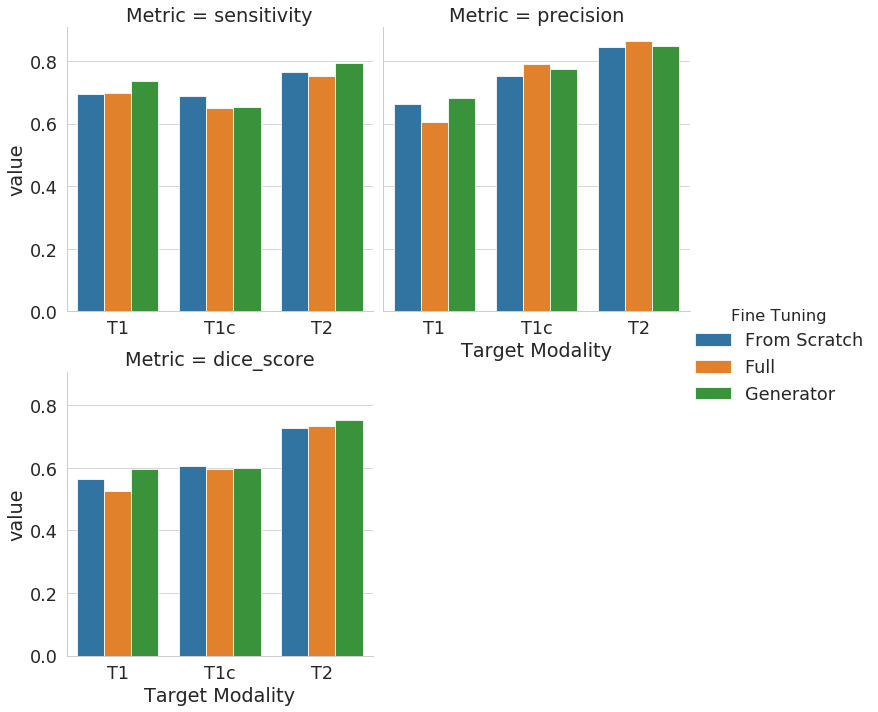

In [10]:
plt.figure(figsize=(16, 8))
# Filter only the Transfer models
temp_data = result_to_plot[result_to_plot['Source Modality'] != 'ALL']
temp_data = temp_data[temp_data['Target Modality'] != 'FLAIR']
#sb.barplot(data=temp_data, y='value', x='Target Modality', hue='Fine Tuning')
# Put the legend out of the figure
sb.catplot(data=temp_data, y='value', col='Metric', hue='Fine Tuning', x='Target Modality', kind='bar', col_wrap=2, sharex=False)

## Validation vs Test accurcy

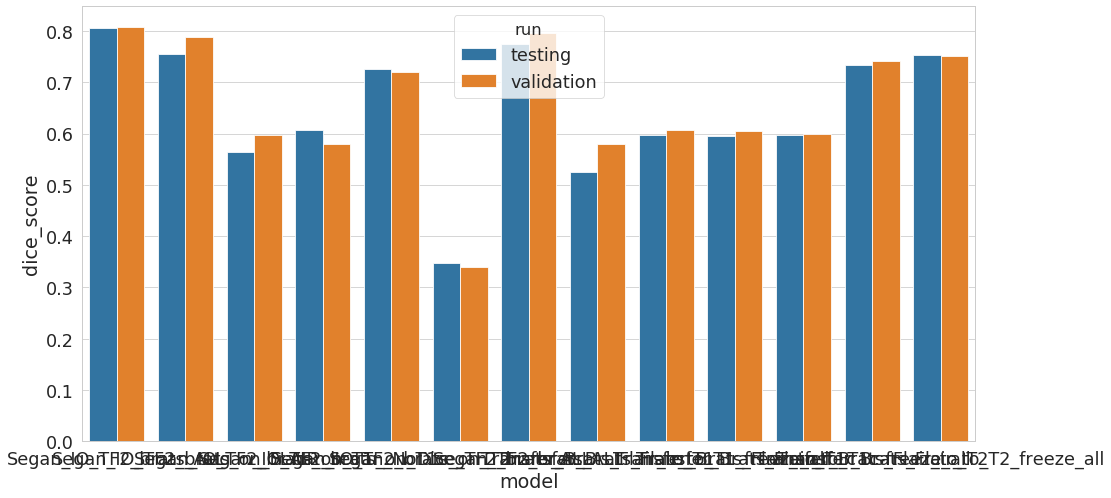

In [12]:
plt.figure(figsize=(16, 8))
sb.barplot(data=means, y='dice_score', x='model', hue='run')

In [13]:
base_models = result_to_plot[result_to_plot['model'].apply(lambda x: 'Transfer' not in x)]
transfer_models = result_to_plot[result_to_plot['model'].apply(lambda x: 'Transfer' not in x)]